## THE SPARKS FOUNDATION : DATA SCIENCE AND BUSINESS ANALYTICS INTERN

### Task 1 : Prediction Using Supervised ML(Linear Regression)
#### Author : Simran Dsouza


To predict the percentage of a student based on the no. of study hours using Supervised Machine Learning Algorithm.

In [2]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
#reading dataset
url = "http://bit.ly/w-data"
data = pd.read_csv(url)

In [5]:
#observing the dataset
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [5]:
#number of columns and rows in dataset
data.shape

(25, 2)

In [6]:
#to find information about the dataset
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


### Data Visualization

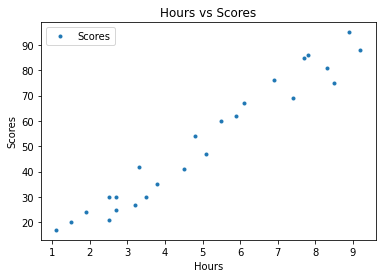

In [9]:
#plotting hours vs score
data.plot(x='Hours',y='Scores',style=".")
plt.title('Hours vs Scores')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.show()

from above graph, we can clearly see there is linear relation between the number of hours studied and percentage scored.

### Data Preparation
Here we will divide the data into 'features'(input) and 'labels'(output).

In [11]:
#using iloc function to divide the dataset
x = data.iloc[:, :1].values
y = data.iloc[:, 1:].values

In [12]:
x

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [13]:
y

array([[21],
       [47],
       [27],
       [75],
       [30],
       [20],
       [88],
       [60],
       [81],
       [25],
       [85],
       [62],
       [41],
       [42],
       [17],
       [95],
       [30],
       [24],
       [67],
       [69],
       [30],
       [54],
       [35],
       [76],
       [86]], dtype=int64)

### Training the Algorithm
In this step we will first split the dataset into training and testing data

In [14]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x , y, test_size = 0.2 , random_state = 0)

After splitting the data into training and testing data we will train the model

In [18]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

### Visualizing the model
After training the model now it's timw to visualize it

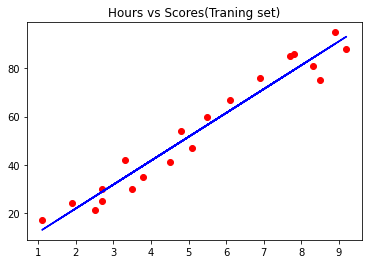

In [23]:
#plotting the linear regression line
line = model.coef_*x+model.intercept_

#plotting for the training set data
plt.title('Hours vs Scores(Traning set)')
plt.scatter(x_train,y_train,color='red')
plt.plot(x,line,color='blue');
plt.show()

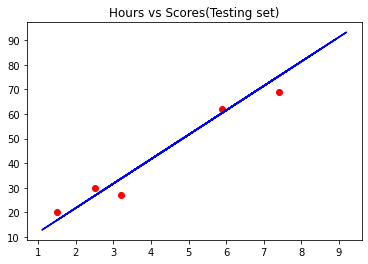

In [24]:
#plotting for the testing set data
plt.title('Hours vs Scores(Testing set)')
plt.scatter(x_test,y_test,color='red')
plt.plot(x,line,color='blue');
plt.show()

### Predictions and Evaluation
Now that we have trained our model its time to make some predictions.

In [25]:
#testing data - In hours
print(x_test)

#Predictig the scores
y_pred = model.predict(x_test) 

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [46]:
#comparing actual vs predicted
df = pd.DataFrame({'Actual':y_test.flatten(), 'Predicted':y_pred.flatten()})
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


#### To predict the score if the student studies for 9.5 hours/day

In [52]:
hours = 9.25
pred = model.predict([[hours]])
print("Predicted Score is",pred[0])

Predicted Score is [93.69173249]


Hence we can conclude that the predicted score if a student studies for 9.25 hours is 93.69173249

### Model Evaluation
We will calculate the mean absolute error 

In [53]:
from sklearn import metrics
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test,y_pred))

Mean Absolute Error: 4.183859899002975
